In [1]:
import pickle
import pandas as pd

from gensim import corpora, models, matutils
from gensim.models.coherencemodel import CoherenceModel
import scipy.sparse

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from skills.data_preprocess.data.inputs import *
from skills.data_preprocess.data_transform import get_jd_dataframe, run_data_transform_pipeline, transform_syllabus_to_lda_model
from skills.data_preprocess.coherence_graph import compute_coherence_values

import logging

import plotly.express as px

import pyLDAvis
import pyLDAvis.gensim_models



In [2]:
f = open('../../skills/data_preprocess/data/inputs/ProductCompanyJD.pickle', 'rb')
product_jd = pickle.load(f)
f.close()

In [3]:
company_names = list(product_jd.keys())
company_names.sort()

In [4]:
jd_df = get_jd_dataframe(product_jd)
jd_df.head()

description
Amazon         \nprogramming experience with at least one mod...
Cisco          \nresponsible for stakeholder interlock\nhelp ...
Goldman Sachs  lead finacle product development and deploymen...
Google         \nminimum qualifications:\n\nmaster's degree i...
IBM            \nwho you are\n\n\nas data scientist, you will...

In [5]:
data_dtm, cv = run_data_transform_pipeline(jd_df, True)
data_dtm.head()

#   +  + business  + design  aaa  aaa sso  ab  ab initio  \
Amazon          0   0           0         0    0        0   0          0   
Cisco          36  20           1         0    3        0   0          0   
Goldman Sachs   0   4           0         0    0        0   0          0   
Google          0   0           0         0    0        0   0          0   
IBM            14   5           0         2    0        0  98         98   

               abap  abilities  ...  ‘big  ‘big data’  ‘cloud  “big  \
Amazon            0         41  ...     0           0       0     0   
Cisco             0         23  ...     0           0       0     0   
Goldman Sachs     0          0  ...     1           1       0     0   
Google            1          4  ...     0           0       0     1   
IBM               0          2  ...     0           0       0     0   

               “big data”  “can  “can do”  “hands  “hands on”  ”  
Amazon                  0     0         0       0           0  0  
Cisco                   0    11        11       0           0  8  
Goldman Sachs           0     0         0       2           2  0  
Google                  1     0         0       0           0  0  
IBM                     0     0         0       0           0  6  

[5 rows x 17652 columns]

EXPLORATORY DATA ANALYSIS

In [6]:
data = data_dtm.transpose()
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)

{'Amazon': [('oriented design', 356), ('java c++', 283), ('language java', 278), ('aws', 260), ('c++ c#', 247), ('unix', 215), ('front end', 189), ('qa', 174), ('mathematics', 157), ('scaling', 136), ('current systems', 125), ('design scaling', 125), ('scaling current', 125), ('code reviews', 122), ('development language', 110), ('assurance', 108), ('reviews source', 105), ('standards code', 104), ('software software', 102), ('ruby', 101), ('excel', 100), ('unix linux', 99), ('quantitative', 91), ('big data', 90), ('processes testing', 88), ('assurance engineer', 86), ('cycle standards', 86), ('manual automation', 86), ('bi', 85), ('engineer manual', 85)], 'Cisco': [('provider', 81), ('communications', 76), ('service provider', 73), ('aws', 62), ('routers', 60), ('outcomes', 60), ('supply chain', 56), ('leader', 55), ('willing', 53), ('intelligence', 53), ('today', 52), ('kubernetes', 51), ('micro', 50), ('ai', 49), ('fraud', 49), ('cx', 48), ('ucs', 47), ('ios', 46), ('servicenow', 46

In [7]:
for job_role, top_words in top_dict.items():
    print(job_role)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Amazon
oriented design, java c++, language java, aws, c++ c#, unix, front end, qa, mathematics, scaling, current systems, design scaling, scaling current, code reviews, development language, assurance, reviews source, standards code, software software, ruby, excel, unix linux, quantitative, big data, processes testing, assurance engineer, cycle standards, manual automation, bi, engineer manual
---
Cisco
provider, communications, service provider, aws, routers, outcomes, supply chain, leader, willing, intelligence, today, kubernetes, micro, ai, fraud, cx, ucs, ios, servicenow, customer success, we’re, business outcomes, jira, webex, vmware, cloud native, wireless, controllers, business transformation, wan
---
Goldman Sachs
risk, consumer, aws, finance, banking, spring, multiple tasks, java python, audit, mathematics, kafka, consumers, shell, update, trading, asset, microservice, energetic, ambiguous, latency, investment, comfortable paced, directional, globally, centric, exceptional ana

In [8]:
tdm = data_dtm.transpose()
tdm.head()

sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

id2word = dict((v, k) for k, v in cv.vocabulary_.items())
word2id = dict((k, v) for k, v in cv.vocabulary_.items())
texts = [[word for word in list(cv.vocabulary_.keys())]]
dictionary = corpora.Dictionary(texts)

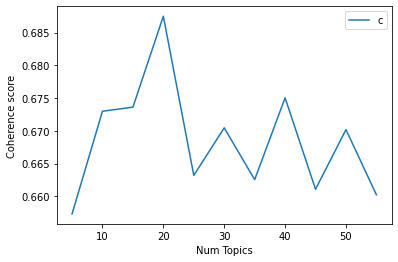

In [9]:
compute_coherence_values(id2word, dictionary, corpus, texts, limit=60, start=5, step=5)

In [13]:
import logging
logging.basicConfig(filename='lda.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO, force=True)

In [13]:
lda7 = models.LdaModel(corpus=corpus, num_topics=12, id2word=id2word, passes=80, iterations= 9000, chunksize = 20000, random_state=42)
lda7.print_topics(12,30)

[(0,
  '0.008*"risk" + 0.003*"consumer" + 0.003*"aws" + 0.003*"finance" + 0.002*"banking" + 0.002*"spring" + 0.002*"multiple tasks" + 0.002*"java python" + 0.002*"audit" + 0.002*"kafka" + 0.002*"mathematics" + 0.002*"asset" + 0.002*"shell" + 0.002*"consumers" + 0.002*"update" + 0.002*"microservice" + 0.002*"trading" + 0.002*"energetic" + 0.002*"ambiguous" + 0.002*"latency" + 0.002*"investment" + 0.002*"directional" + 0.002*"comfortable paced" + 0.002*"centric" + 0.002*"globally" + 0.002*"paced ambiguous" + 0.002*"commercial solutions" + 0.002*"credit" + 0.002*"markets" + 0.002*"exceptional analytical"'),
 (1,
  '0.007*"programs" + 0.005*"division" + 0.005*"functional area" + 0.005*"software programs" + 0.005*"troubleshoot debug" + 0.005*"bs relevant" + 0.005*"develop troubleshoot" + 0.005*"debug software" + 0.005*"area software" + 0.004*"design develop" + 0.004*"cloud infrastructure" + 0.004*"software architecture" + 0.004*"networks software" + 0.004*"software tasks" + 0.003*"varied" +

In [19]:
lda15 = models.LdaModel(corpus=corpus, num_topics=15, id2word=id2word, passes=80, iterations= 9000, chunksize = 20000, random_state=42)
lda15.print_topics(15,30) 

[(0,
  '0.008*"programs" + 0.007*"functional area" + 0.006*"software programs" + 0.006*"area software" + 0.006*"troubleshoot debug" + 0.006*"develop troubleshoot" + 0.006*"debug software" + 0.005*"design develop" + 0.005*"cloud infrastructure" + 0.005*"software architecture" + 0.005*"networks software" + 0.004*"software tasks" + 0.004*"varied" + 0.004*"lower" + 0.004*"competent" + 0.004*"personnel" + 0.004*"area expertise" + 0.004*"expertise lead" + 0.003*"qa" + 0.003*"software developers" + 0.003*"software software" + 0.003*"designing software" + 0.003*"leadership software" + 0.003*"tenant" + 0.003*"multi tenant" + 0.003*"systems leadership" + 0.003*"test plans" + 0.003*"routine" + 0.003*"debugging software" + 0.003*"kubernetes"'),
 (1,
  '0.013*"careers" + 0.009*"mobility" + 0.006*"test automation" + 0.006*"b" + 0.005*"industrial" + 0.004*"intelligent" + 0.003*"electronics" + 0.003*"b tech" + 0.003*"bug" + 0.003*"healthcare" + 0.003*"https" + 0.003*"defect" + 0.003*"mca" + 0.003*"en"

In [20]:
#Coherence for 15 topics model
coherencemodel = CoherenceModel(model=lda15, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.6611930494698508


In [9]:
lda30 = models.LdaModel(corpus=corpus, num_topics=30, id2word=id2word, passes=120, iterations= 9000, chunksize = 20000, random_state=42)
lda30.print_topics(30,30) #lda_final

[(0,
  '0.000*"google’s" + 0.000*"cutting" + 0.000*"technologies hardware" + 0.000*"android" + 0.000*"intelligence" + 0.000*"phd" + 0.000*"information retrieval" + 0.000*"rtl" + 0.000*"solutions enterprise" + 0.000*"mathematics" + 0.000*"fraud" + 0.000*"seamless" + 0.000*"recommended" + 0.000*"business solutions" + 0.000*"largest" + 0.000*"display" + 0.000*"heart" + 0.000*"display leadership" + 0.000*"analysts" + 0.000*"enthusiastic" + 0.000*"big complex" + 0.000*"big data" + 0.000*"transform" + 0.000*"grade" + 0.000*"grade cloud" + 0.000*"storage solutions" + 0.000*"agencies" + 0.000*"business systems" + 0.000*"working" + 0.000*"qualities"'),
 (1,
  '0.000*"status status" + 0.000*"ethernet" + 0.000*"elements" + 0.000*"drivers" + 0.000*"intelligence" + 0.000*"aws" + 0.000*"fpga" + 0.000*"business data" + 0.000*"unix" + 0.000*"qa" + 0.000*"communications" + 0.000*"centers" + 0.000*"sw" + 0.000*"data centers" + 0.000*"data driven" + 0.000*"mpls" + 0.000*"programs" + 0.000*"pc" + 0.000*"r

In [17]:
lda60 = models.LdaModel(corpus=corpus, num_topics=60, id2word=id2word, passes=120, iterations= 9000, chunksize = 20000, random_state=42)
lda60.print_topics(60,30) 

[(0,
  '0.000*"process post" + 0.000*"process reengineering" + 0.000*"process redesign" + 0.000*"process software" + 0.000*"process domain" + 0.000*"process strong" + 0.000*"process successful" + 0.000*"process support" + 0.000*"process system" + 0.000*"process systems" + 0.000*"process service" + 0.000*"process solutions" + 0.000*"process etc" + 0.000*"process owners" + 0.000*"process oriented" + 0.000*"process optimization" + 0.000*"process multi" + 0.000*"process model" + 0.000*"process mapping" + 0.000*"process manage" + 0.000*"process instrumentation" + 0.000*"process improvements" + 0.000*"process improvement" + 0.000*"process hands" + 0.000*"process functional" + 0.000*"process flows" + 0.000*"process external" + 0.000*"process procedures" + 0.000*"process qa" + 0.000*"process product"'),
 (1,
  '0.000*"mobility" + 0.000*"test automation" + 0.000*"careers" + 0.000*"functional area" + 0.000*"programs" + 0.000*"cloud infrastructure" + 0.000*"design develop" + 0.000*"develop troubl

In [18]:
#Coherence for 60 topics model
coherencemodel = CoherenceModel(model=lda60, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.7145501038605196


In [14]:
#Topics 30 is the final model
f = open('models/lda30.pickle', 'rb')
lda_final = pickle.load(f)
f.close()

In [15]:
#Coherence for 30 topics model
coherencemodel = CoherenceModel(model=lda_final, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherencemodel.get_coherence())

0.8054265984576817


In [123]:
def format_topics_companies(ldamodel=None, corpus=corpus, texts=data):
    '''Create Dominant Topic Per Company DataFrame'''
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num, 60)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_companies(ldamodel=lda_final, corpus=corpus, texts=texts)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Company', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']
df_dominant_topic['Company'] = company_names
df_dominant_topic.head(10)

Company  Dominant_Topic  Topic_Perc_Contrib  \
0         Amazon            10.0              0.2295   
1          Cisco            27.0              0.1851   
2  Goldman Sachs            22.0              0.1981   
3         Google            27.0              0.1668   
4            IBM            24.0              0.1800   
5          Intel            12.0              0.1448   
6        Juniper            15.0              0.1715   
7      Microsoft             7.0              0.1935   
8         Oracle            27.0              0.2580   
9      Schneider             4.0              0.2348   

                                            Keywords  
0  oriented design, java c++, language java, aws,...  
1  programs, functional area, software programs, ...  
2  risk, consumer, aws, finance, banking, spring,...  
3  programs, functional area, software programs, ...  
4  spring, targets, unix, regulatory, effort, ape...  
5  status status, elements, ethernet, pc, data ce...  
6  mpls, drivers, ethernet, router, deployments, ...  
7  c# java, sap, check, specialized, screening, c...  
8  programs, functional area, software programs, ...  
9  careers, mobility, test automation, b, industr...

In [ ]:
f = open('DominantTopicPerCompany.pickle', 'wb')
pickle.dump(df_dominant_topic, f)
f.close()

In [ ]:
#This function can be used to get the topic terms of the most probable topic per company
def get_prominent_topic_terms(company, df):
    idx = df[df['Company']== company].index.values
    keywords = list(df.loc[idx, 'Keywords'])
    return keywords

SYLLABUS DATA PREDICTIONS 

Load model and make predictions on the CS syllabus 2018 and CS syllabus 2014 data

In [ ]:
result_syl_jd_topics18 = transform_syllabus_to_lda_model(lda_final, dictionary, '2018')
result_syl_jd_topics14 = transform_syllabus_to_lda_model(lda_final, dictionary, '2014')

In [ ]:
with open('LdaProductCom18.html', 'a') as plotfile:
  for key, value in result_syl_jd_topics18.items():
    plotfile.write(str(key))
    plotfile.write("\n\n")
    for topic, percentage in value.items():
        topic_list = lda_final.show_topic(topic,30)
        fig = px.bar(x=[val[1] for val in topic_list], y=[val[0] for val in topic_list])
        plotfile.write(fig.to_html(full_html=False, include_plotlyjs=False))
        plotfile.write("\n\n")

In [ ]:
with open('LdaProductCom14.html', 'a') as plotfile:
  for key, value in result_syl_jd_topics14.items():
    plotfile.write(str(key))
    plotfile.write("\n\n")
    for topic, percentage in value.items():
        topic_list = lda_final.show_topic(topic,30)
        fig = px.bar(x=[val[1] for val in topic_list], y=[val[0] for val in topic_list])
        plotfile.write(fig.to_html(full_html=False, include_plotlyjs=False))
        plotfile.write("\n\n")

TOPIC VISUALIZATION FOR JD MODEL

In [10]:
# Topic Visualization
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(lda_final, corpus, dictionary, sort_topics=False)
viz

/Users/aproy/opt/miniconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
0      0.090172+0.000000j  0.004433+0.000000j       1        1   0.000107
1      0.090172+0.000000j  0.004433+0.000000j       2        1   0.000107
2     -0.137906+0.000000j -0.017740+0.000000j       3        1   5.586141
3      0.090172+0.000000j  0.004433+0.000000j       4        1   0.000107
4     -0.083296+0.000000j  0.012478+0.000000j       5        1  12.155344
5      0.090172+0.000000j  0.004433+0.000000j       6        1   0.000107
6      0.090172+0.000000j  0.004433+0.000000j       7        1   0.000107
7     -0.123315+0.000000j -0.086149+0.000000j       8        1   8.980788
8      0.113340+0.000000j  0.022696+0.000000j       9        1   0.000107
9     -0.155772+0.000000j -0.006781+0.000000j      10        1   7.025159
10    -0.115278+0.000000j -0.143024+0.000000j      11        1   8.499330
11     0.090172+0.000000j  0.004433+0.000000j      12        1   0.000107
12    -0.203421+0.000000j  0.174532+0.000000j      13        1   7.464450
13     0.090172+0.000000j  0.004433+0.000000j      14        1   0.000107
14     0.130890+0.000000j  0.007738+0.000000j      15        1   0.039286
15    -0.182592+0.000000j  0.091542+0.000000j      16        1   6.612635
16     0.090172+0.000000j  0.004433+0.000000j      17        1   0.000107
17     0.090172+0.000000j  0.004433+0.000000j      18        1   0.000107
18     0.090172+0.000000j  0.004433+0.000000j      19        1   0.000107
19     0.090172+0.000000j  0.004433+0.000000j      20        1   0.000107
20     0.090172+0.000000j  0.004433+0.000000j      21        1   0.000107
21     0.090172+0.000000j  0.004433+0.000000j      22        1   0.000107
22    -0.120663+0.000000j -0.185205+0.000000j      23        1   8.642179
23     0.090172+0.000000j  0.004433+0.000000j      24        1   0.000107
24    -0.191075+0.000000j -0.138161+0.000000j      25        1   6.681507
25     0.090172+0.000000j  0.004433+0.000000j      26        1   0.000107
26    -0.153223+0.000000j  0.010598+0.000000j      27        1   8.397708
27    -0.082519+0.000000j -0.099498+0.000000j      28        1  16.599936
28     0.103250+0.000000j  0.006256+0.000000j      29        1   0.000107
29    -0.150993+0.000000j  0.284226+0.000000j      30        1   3.313710, topic_info=                      Term        Freq       Total Category  logprob  loglift
15130  sterling integrator  715.000000  715.000000  Default  30.0000  30.0000
2063               careful  587.000000  587.000000  Default  29.0000  29.0000
6377   expertise languages  201.000000  201.000000  Default  28.0000  28.0000
7060      functional agile  383.000000  383.000000  Default  27.0000  27.0000
9978                 mocha  435.000000  435.000000  Default  26.0000  26.0000
...                    ...         ...         ...      ...      ...      ...
8506         iot platforms   24.890245  222.997003  Topic30  -6.2153   1.2144
9288           linux large   22.040801   75.918817  Topic30  -6.3369   2.1703
7593           help design   22.980117  240.783349  Topic30  -6.2951   1.0578
14273                 soft   22.161326   91.344505  Topic30  -6.3314   1.9908
10541                nodes   22.056585   91.725912  Topic30  -6.3361   1.9819

[1974 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
0          8  0.032782                   #
0         25  0.098347                   #
0         27  0.852342                   #
0         28  0.032782                   #
1          5  0.345807                   +
...      ...       ...                 ...
17564     28  0.117927                 wpf
17575      5  0.977757     writing complex
17614      5  0.063256  years’ development
17614     27  0.948840  years’ development
17625      5  0.552666          yield test

[3483 rows x 3 columns], R=30, lambda_step=0.01, plot_o

In [11]:
pyLDAvis.save_html(viz, 'Viz.html')

WORD CLOUD PER TOPIC 

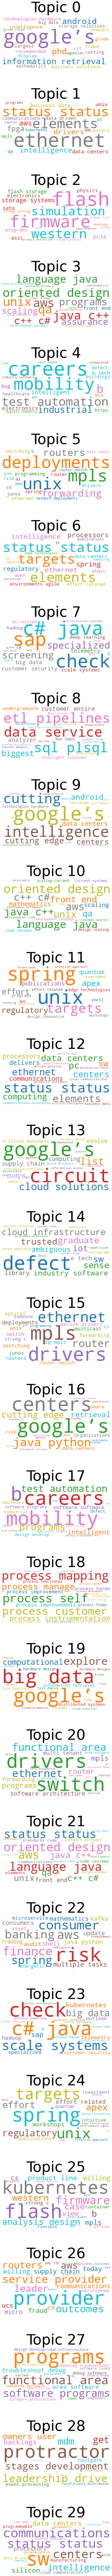

In [126]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  max_words=50,
                  colormap='tab10',
                  prefer_horizontal=1.0)

topics = lda_final.show_topics(num_topics=30, num_words=20, formatted=False)

fig, axes = plt.subplots(30, 1, figsize=(200,200))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=70)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=80))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(h_pad=10, w_pad=10)
plt.savefig('TopicWordCloud.pdf')
plt.show()